In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [23]:
#Created Measurement Dataframe using SQL queries
measurements =  pd.read_sql('Select * from measurement', conn)
measurements

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [24]:
station = pd.read_sql('Select * from station', conn)
station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

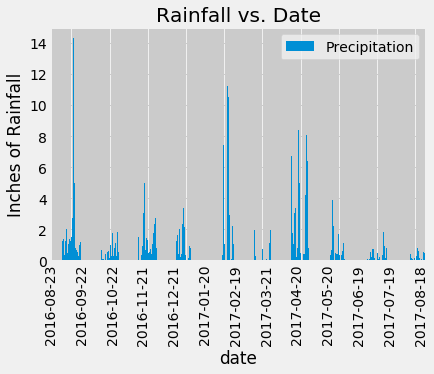

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_twelve = pd.read_sql('Select * from measurement where date between "2016-08-23" and "2017-08-23"', conn)

# Perform a query to retrieve the data and precipitation scores

last_twelve = last_twelve[['date', 'prcp']]

# Save the query results as a Pandas DataFrame and set the index to the date column

last_twelve = last_twelve.set_index('date')

# Sort the dataframe by date

last_twelve = last_twelve.sort_values('date')
last_twelve_grp = last_twelve.groupby(['date']).sum()
last_twelve_grp


# Use Pandas Plotting with Matplotlib to plot the data


ax = last_twelve_grp.plot(kind = 'bar')
plt.title('Rainfall vs. Date')
plt.ylabel('Inches of Rainfall')
legend = plt.legend()
legend.get_texts()[0].set_text('Precipitation')
every_nth = 30
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


plt.show()


In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip = measurements['prcp'].describe()
precip

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [10]:
# Design a query to show how many stations are available in this dataset?
station['station'].count()

9

In [11]:
station_sql = pd.read_sql('Select Count(station) as "Station Count" from station', conn)
station_sql

,Station Count
0,9


In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity = measurements['station'].value_counts()
activity = pd.DataFrame(activity)
activity = activity.sort_values('station', ascending = False)
#
activity

,station
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [13]:
activity_sql = pd.read_sql('select count(station) as "Activity Count", station from measurement group by station order by "Activity Count" Desc', conn)
#
activity_sql

,Activity Count,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = measurements.loc[measurements['station']== 'USC00519281']
#
max_active_station = active_station['tobs'].max()
min_active_station = active_station['tobs'].min()
mean_active_station = active_station['tobs'].mean()
#
active = {'Maximum Temp.' : max_active_station, 'Minimum Temp.' : min_active_station, 'Average Temp.' : mean_active_station}
active

{'Maximum Temp.': 85.0,
 'Minimum Temp.': 54.0,
 'Average Temp.': 71.66378066378067}

In [15]:
active_station_sql = pd.read_sql("select * from measurement where station = 'USC00519281'", conn)
#
active_maxsql = pd.read_sql("select Max(tobs) as 'Maximum Temperature' from measurement where station = 'USC00519281'", conn)
active_minsql = pd.read_sql("select Min(tobs) as 'Minimum Temperature' from measurement where station = 'USC00519281'",conn)
active_avgsql = pd.read_sql("select Avg(tobs) as 'Average Temperature' from measurement where station = 'USC00519281'", conn)
#
print(active_maxsql)
print(active_minsql)
print(active_avgsql)

   Maximum Temperature
0                 85.0
   Minimum Temperature
0                 54.0
   Average Temperature
0            71.663781


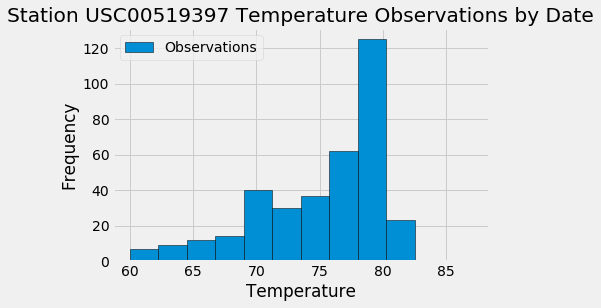

In [31]:
# Choose the station with the highest number of temperature observations.
twelvestation = pd.read_sql('Select count(tobs) as count, station from measurement where  date between "2016-08-23" and "2017-08-23" group by station order by count desc', conn) 
twelvestation

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = pd.read_sql('Select date, tobs from measurement where date between "2016-08-23" and "2017-08-23" and station = "USC00519397"', conn)
hist = hist.set_index('date')
hist
#
hist.plot(kind = 'hist', bins = 12, title = "Station USC00519397 Temperature Observations by Date", edgecolor = 'black')
plt.xlabel('Temperature')
hist
legend = plt.legend()
legend.get_texts()[0].set_text('Observations')

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
from flask import Flask, jsonify
session = Session(bind = engine)


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
